# Implement AdaBoost with decision stumps, i.e., 1-level decision trees
In this question, you will implement the AdaBoost algorithm with decision stumps, i.e., 1-level decision trees.
You will need to implement the adaboost algorithm from scratch and train and test the classifier on the
dataset provided

In [1]:
import numpy as np
import matplotlib.pyplot as plt


In [2]:
class AdaBoost:
    def __init__(self, X, y, T):
        # Initialize the model
        # X: data points
        # y: labels
        # T: number of iterations
        # w: weights
        # N: number of training data points
        
        self.X = X
        self.y = y
        self.T = T
        self.N = len(X)
        self.w = np.ones(self.N) / self.N
        
        #---------Define other variables as needed
            
        self.alphas = []
        self.classifiers = []

    def find_next_weak_Learner(self):
        # Find best decision stump
        # Output should define the axis, threshold, polarity and weight of the decision stump
        # You should also update the weights of the data points here

        # TODO
        best_stump = {
            'feature': None,
            'threshold': None,
            'polarity': None,
            'error': float('inf'),
            'alpha': None
        }
        for feature in range(self.X.shape[1]):
            feature_values = self.X[:, feature]
            thresholds = np.unique(feature_values)
            
            for threshold in thresholds:
                for polarity in [1, -1]:
                    predictions = np.where(feature_values * polarity < threshold * polarity, -1, 1)
                    weighted_errors = self.w[predictions != self.y].sum()
                    if weighted_errors < best_stump['error']:
                        best_stump['feature'] = feature
                        best_stump['threshold'] = threshold
                        best_stump['polarity'] = polarity
                        best_stump['error'] = weighted_errors
                        best_stump['predictions'] = predictions

        best_stump['alpha'] = 0.5 * np.log((1 - best_stump['error']) / max(best_stump['error'], 1e-10))
        return best_stump

    def train(self):
        # Train the model for T iterations
        for t in range(self.T):
            # Train weak learner
            # TODO
            stump = self.find_next_weak_Learner()
            self.alphas.append(stump['alpha'])
            self.classifiers.append(stump)
            
            self.w *= np.exp(-stump['alpha'] * self.y * stump['predictions'])
            self.w /= np.sum(self.w)

    def predict_K(self, X, K):
        # Compute prediction of the model for X using first K weak learners
        # Output should be a vector of labels of length X.shape[0]
        # TODO
        pred = np.zeros(X.shape[0])

        for i in range(min(K, len(self.classifiers))):
            stump = self.classifiers[i]
            feature_values = X[:, stump['feature']]
            stump_predictions = np.where(feature_values * stump['polarity'] < stump['threshold'] * stump['polarity'], -1, 1)
            pred += self.alphas[i] * stump_predictions

        return np.sign(pred)

    def accuracy_K(self, X, y, K):
        # Compute accuracy of the model for (X, y) using first K weak learners
        # Output should be a scalar in [0, 1]
        # TODO
        predictions = self.predict_K(X, K)
        return np.mean(predictions == y)
    
    def scatter_plot(self):
        # Plot the data points and the decision boundary
        # You need not edit this function as long as you have defined the predict_K function properly 
        X = np.asarray([[x_cor, y_cor] for x_cor in np.linspace(np.amin(self.X[:, 0]), np.amax(self.X[:, 0]), 500) for y_cor in np.linspace(np.amin(self.X[:, 1]), np.amax(self.X[:, 1]), 500)])

        fig, ax = plt.subplots(3, 3, figsize=(30, 30))

        for i, K in enumerate([1, 5, 10, 20, 30, 100, 200, 400, 600]):
            # Plot the data points and the decision boundary using k weak learners
            print("Plotting the data points and the decision boundary using {} weak learners".format(K))
            Z_pred = self.predict_K(X, K)

            ax[i // 3, i % 3].scatter(X[:, 0], X[:, 1], c=['white' if z == 1 else 'orange' for z in Z_pred], s=1)
            for numpoint, point in enumerate(self.X):
                ax[i // 3, i % 3].scatter(point[0], point[1], c='black' if self.y[numpoint]==1 else 'red', marker='x' if self.y[numpoint]==1 else 'o')
            ax[i // 3, i % 3].set_title("K = {}".format(K), fontsize=20)
        plt.show()


# Code for Training Routine
### Load Data

In [3]:
#---------------Read the training and testing files
training_data=np.genfromtxt('train_adaboost.csv', delimiter=',')
X_train = training_data[:,0:2]
y_train = training_data[:,2]

testing_data=np.genfromtxt('test_adaboost.csv', delimiter=',')
X_test = testing_data[:,0:2]
y_test = testing_data[:,2]

### Data Visualization

Text(0.5, 1.0, 'Training data')

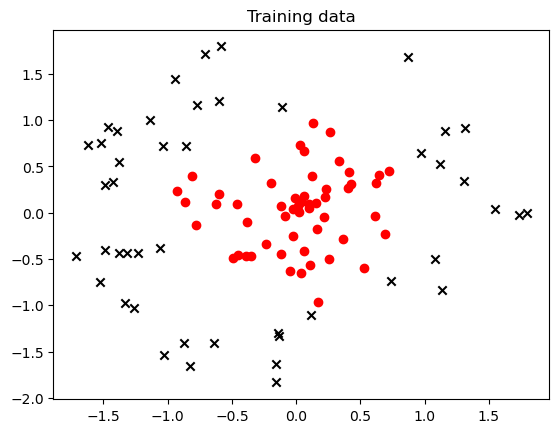

In [4]:
#---------------Plot the training data
fig, ax = plt.subplots()
for numpoint, point in enumerate(X_train):
    ax.scatter(point[0], point[1], c='black' if y_train[numpoint]==1 else 'red', marker='x' if y_train[numpoint]==1 else 'o')
ax.set_title('Training data')

### Start Training

In [5]:
T=600

# Start training
train_adaboost = AdaBoost(X_train, y_train, T)
train_adaboost.train()

### Plot training and testing accuracy

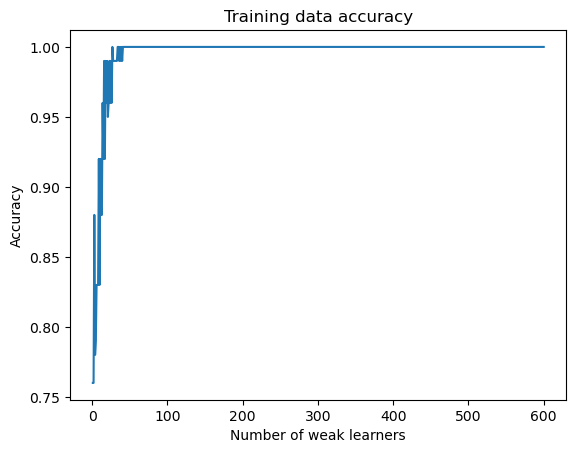

In [6]:
# Plot training data accuracy
accuracy_score = []
for t in range(T):
    accuracy_score.append(train_adaboost.accuracy_K(X_train, y_train, t + 1))
plt.plot(range(1, T + 1), accuracy_score)
plt.xlabel('Number of weak learners')
plt.ylabel('Accuracy')
plt.title('Training data accuracy')
plt.show()

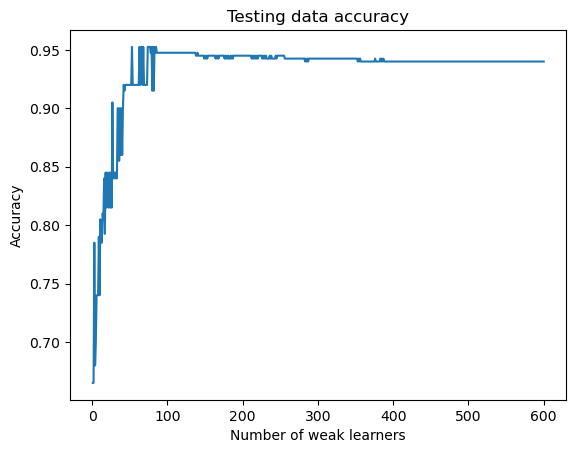

In [7]:
# Plot testing data accuracy
accuracy_score = []
for t in range(T):
    accuracy_score.append(train_adaboost.accuracy_K(X_test, y_test, t + 1))
plt.plot(range(1, T + 1), accuracy_score)
plt.xlabel('Number of weak learners')
plt.ylabel('Accuracy')
plt.title('Testing data accuracy')
plt.show()

### Plot the data points and the decision boundary using k weak learners

Plotting the data points and the decision boundary using 1 weak learners
Plotting the data points and the decision boundary using 5 weak learners
Plotting the data points and the decision boundary using 10 weak learners
Plotting the data points and the decision boundary using 20 weak learners
Plotting the data points and the decision boundary using 30 weak learners
Plotting the data points and the decision boundary using 100 weak learners
Plotting the data points and the decision boundary using 200 weak learners
Plotting the data points and the decision boundary using 400 weak learners
Plotting the data points and the decision boundary using 600 weak learners


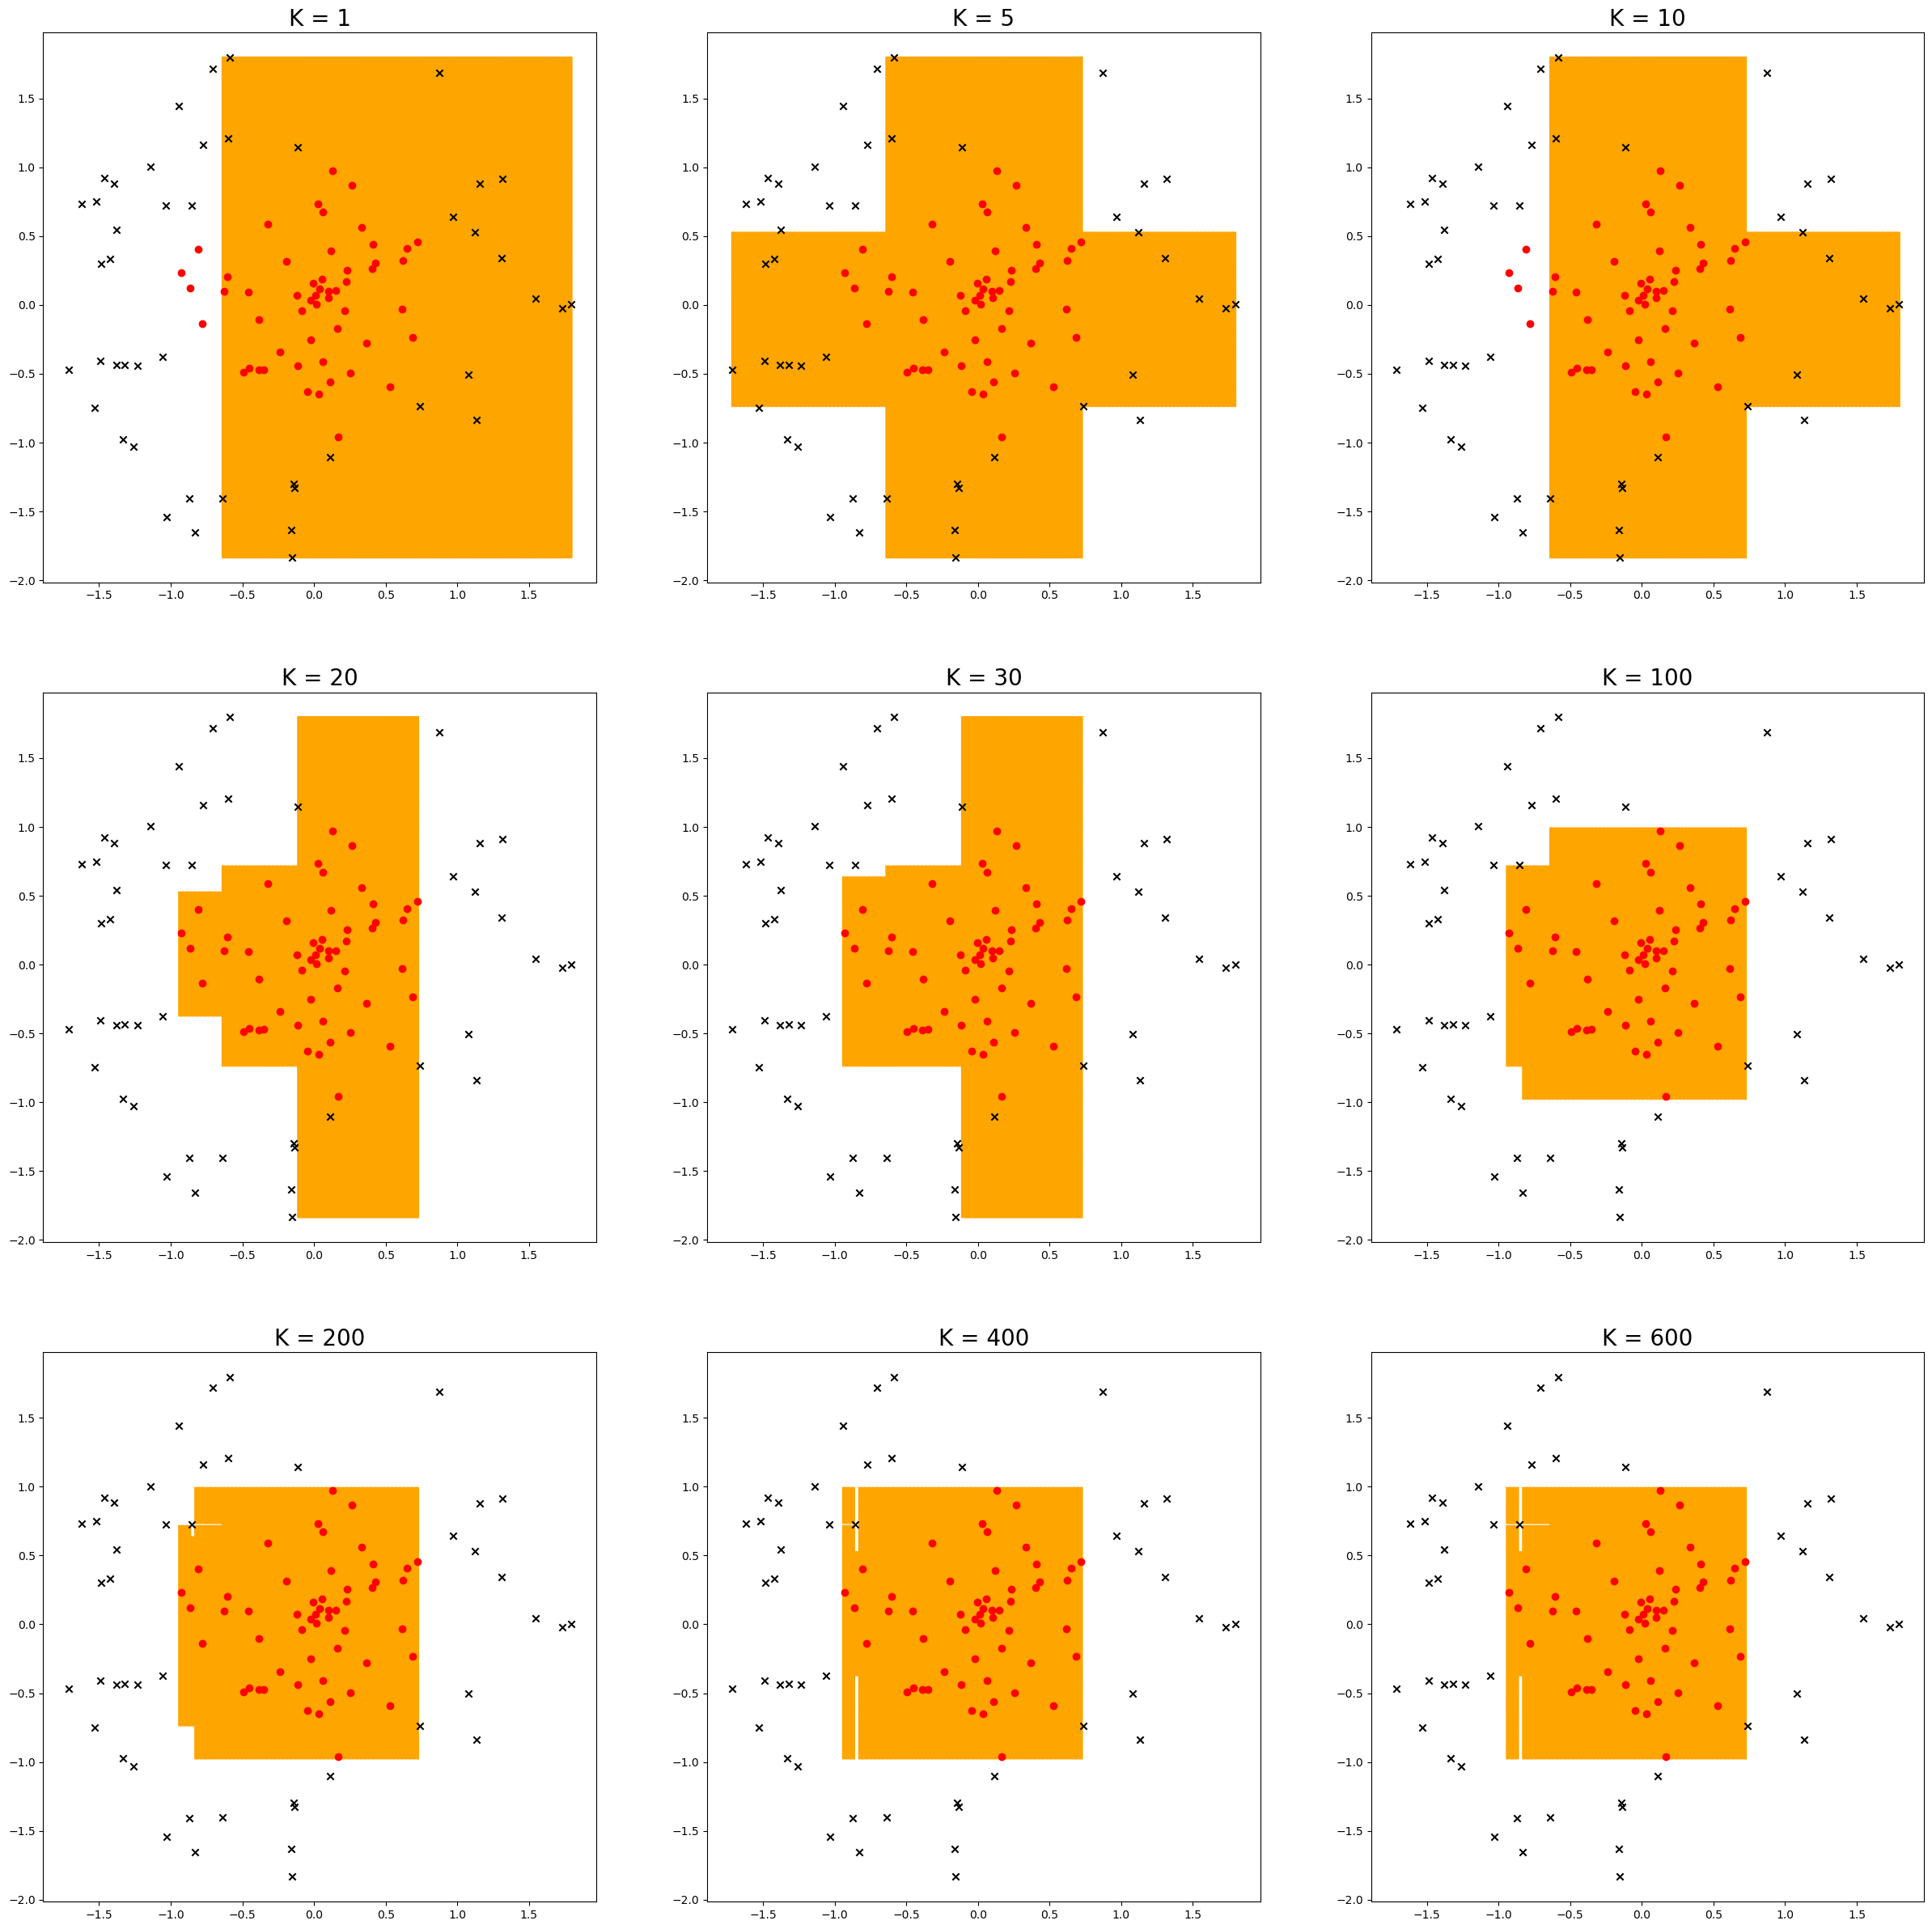

In [8]:
train_adaboost.scatter_plot()